In [ ]:
import os
import pandas as pd

# Function to check if the file has the correct structure
def is_correct_structure(file_path):
  with open(file_path, 'r') as f:
      lines = f.readlines()
      if len(lines) != 3:
        return False
      for line in lines:
        try:
          values = eval(line.strip())
        except:
          continue
        if len(values) != 101 or values[0] not in [1, 2, 3]:
          return False
  return True

# Function to load data from a file and return a list of tuples (label, vector)
def load_data_from_file(file_path):
  data = []
  with open(file_path, 'r') as f:
    lines = f.readlines()
    for line in lines:
      try:
        values = eval(line.strip())
      except:
        continue
      label = int(values[0])
      vector = list(values[1:])
      data.append((label, vector))
  return data

# Main function to load all txt files in a directory and make a pandas dataframe
def load_data_from_directory(dir_path):
  all_data = []
  for file in os.listdir(dir_path):
    file_path = os.path.join(dir_path, file)
    if file.endswith('.txt') and is_correct_structure(file_path):
      all_data.extend(load_data_from_file(file_path))
  
  df = pd.DataFrame(all_data, columns=['label', 'vector'])
  return df

# Example usage
# Example usage
dir_path_1 = 'vec1'
dir_path_2 = 'vec2'

dataframe_1 = load_data_from_directory(dir_path_1)
dataframe_2 = load_data_from_directory(dir_path_2)

# Combine dataframes from both directories
combined_dataframe = pd.concat([dataframe_1, dataframe_2], ignore_index=True)
print(combined_dataframe)
# Save the dataframe to a CSV file
combined_dataframe.to_csv('combined_dataframe.csv', index=False)

# Save the dataframe to a Pickle file
combined_dataframe.to_pickle('combined_dataframe.pkl')

      label                                             vector
0         3  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
1         3  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
2         3  [-1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1,...
3         3  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
4         3  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
...     ...                                                ...
2461      1  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
2462      1  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
2463      3  [-1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1...
2464      3  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...
2465      3  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...

[2466 rows x 2 columns]


Iteration 1: Test accuracy: 85.76%
Confusion matrix:


Classification report:
              precision    recall  f1-score   support

    Negative       0.89      0.81      0.85       165
    Positive       0.83      0.90      0.86       165

    accuracy                           0.86       330
   macro avg       0.86      0.86      0.86       330
weighted avg       0.86      0.86      0.86       330


Iteration 2: Test accuracy: 90.00%
Confusion matrix:


Classification report:
              precision    recall  f1-score   support

    Negative       0.90      0.90      0.90       165
    Positive       0.90      0.90      0.90       165

    accuracy                           0.90       330
   macro avg       0.90      0.90      0.90       330
weighted avg       0.90      0.90      0.90       330


Iteration 3: Test accuracy: 89.06%
Confusion matrix:


Classification report:
              precision    recall  f1-score   support

    Negative       0.89      0.89      0.89       164
 

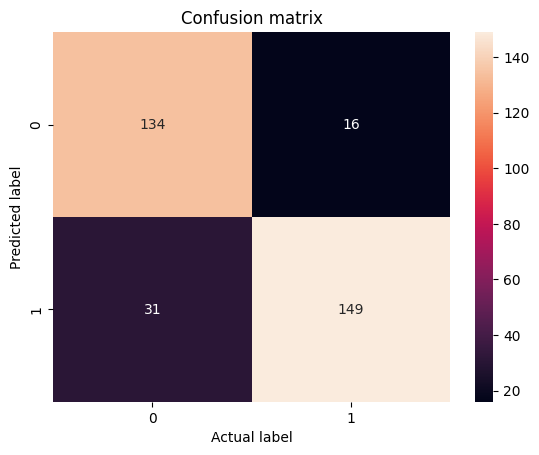

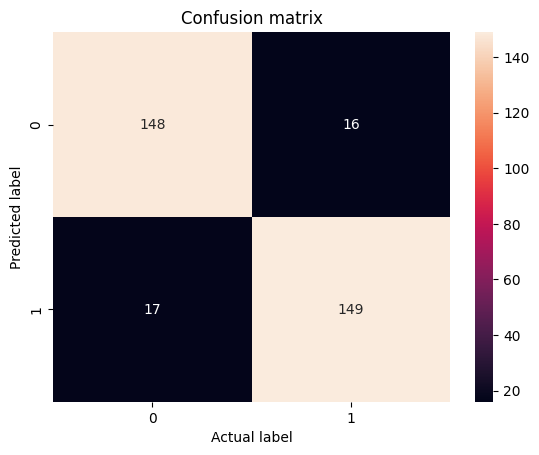

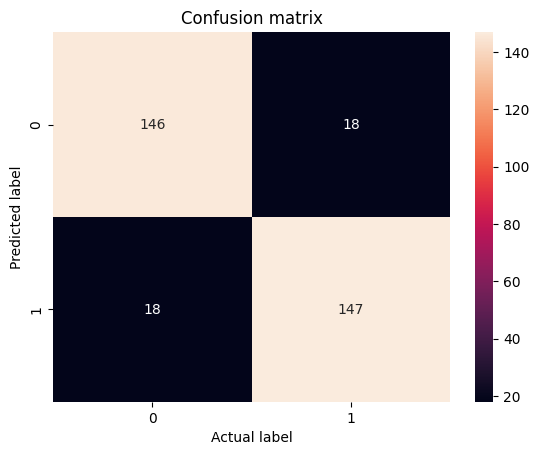

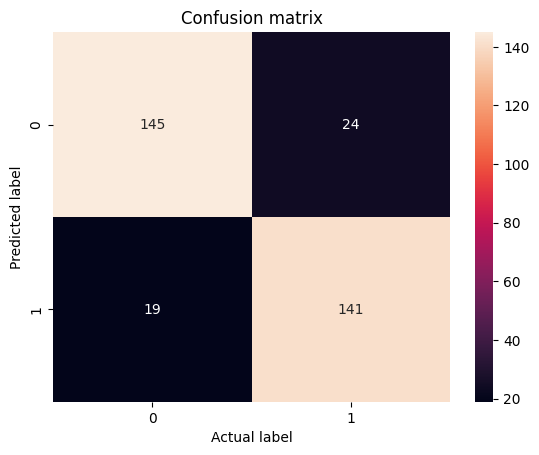

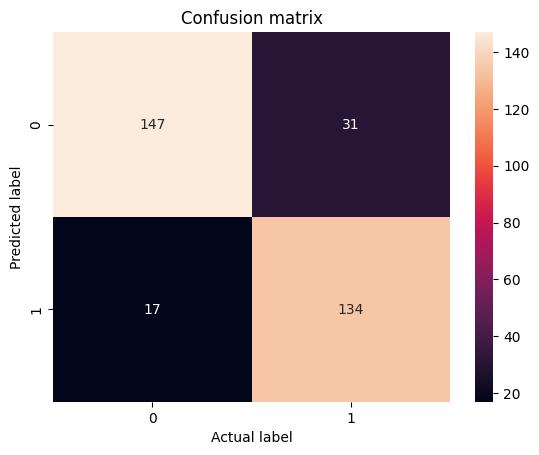

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

class Adaline(object):

    def __init__(self, rate=0.001, epoch=50):
        self.l_rate = rate
        self.epoch = epoch
        self.weights = []
        self.costs = []

# training the data- 1. adding bias. 2. shuffling. 3. training
    def fit(self, X, y):
    
        row = X.shape[0]
        col = X.shape[1]
        # bias
        X = self._bias(X, (row, col))
        # weights
        np.random.seed(1)
        self.weights = np.random.rand(col + 1)
        # training
        for iter in range(self.epoch):
            # shuffling
            X, y = self._shuffle(X, y)
            cost = []
            for sample, label in zip(X, y):
                cost.append(self._update_weights(sample, label))
            # computing the avg cost and adding to cost list
            avg = sum(cost) / len(y)
            self.costs.append(avg)
        return self

    def _update_weights(self, sample, label):
        result = self.net_input(sample)
        error = label - result
        self.weights += self.l_rate * sample.dot(error)
        # cost = 0.5 * (error ** 2)
        return (error ** 2) / 2

    def _shuffle(self, X, y):
        per = np.random.permutation(len(y))
        return X[per], y[per]

# calculating the net input using matrix multiplication
    def net_input(self, X):
        return X @ self.weights

# predict sample label - if data and weights are not in the same shape
#        we should add bias in order to perform matrix multiplication
    def predict(self, X):
        if len(X.T) != len(self.weights):
            X = self._bias(X, (X.shape[0], X.shape[1]))
        return np.where(self.net_input(X) > 0.0, 1, -1)


# adding bias to the data
    def _bias(self,X, size):
        bias = np.ones((size[0], size[1] + 1))
        bias[:, 1:] = X
        X = bias
        return X

# Function print confusion matrix 
def plot_confusion_matrix(predictions, y_test):
    cm = confusion_matrix(predictions, y_test)
    plt.subplots()
    sns.heatmap(cm, fmt=".0f", annot=True)
    plt.title("Confusion matrix")
    plt.xlabel("Actual label")
    plt.ylabel("Predicted label")


# Load the saved dataframe
dataframe = pd.read_pickle('combined_dataframe.pkl')

# Filter the dataframe to include only labels 1 and 2
dataframe = dataframe[dataframe['label'].isin([1, 2])]

# Prepare the input data (X) and labels (y)
X = np.array([np.array(x) for x in dataframe['vector']])
y = np.array(dataframe['label'])

# Convert labels 1 and 2 to -1 and 1
y = np.where(y == 1, -1, 1)

# # Normalize the input data
X = (X - X.mean()) / X.std()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies=[]

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    adaline = Adaline(rate=0.001, epoch=50)
    adaline.fit(X_train, y_train)

    predictions = adaline.predict(X_test)
    accuracy = np.mean(predictions == y_test)
    accuracies.append(accuracy)
    print(f"Iteration {i+1}: Test accuracy: {accuracy * 100:.2f}%")
    # Print confusion matrix and classification report
    print(f"Confusion matrix:\n")
    plot_confusion_matrix(predictions, y_test)
    cr = classification_report(y_test, predictions, target_names=['Negative', 'Positive'])
    print(f"\nClassification report:\n{cr}\n")


# Calculate the average accuracy and standard deviation
avg_accuracy = np.mean(accuracies)
std_deviation = np.std(accuracies)
print(f"Average accuracy: {avg_accuracy * 100:.2f}%")
print(f"Standard deviation: {std_deviation * 100:.2f}%")






Iteration 1: Test accuracy: 84.24%
Confusion matrix:


Classification report:
              precision    recall  f1-score   support

    Negative       0.85      0.84      0.84       165
    Positive       0.84      0.85      0.84       165

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.84      0.84      0.84       330


Iteration 2: Test accuracy: 90.61%
Confusion matrix:


Classification report:
              precision    recall  f1-score   support

    Negative       0.94      0.87      0.90       165
    Positive       0.88      0.94      0.91       165

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330


Iteration 3: Test accuracy: 85.11%
Confusion matrix:


Classification report:
              precision    recall  f1-score   support

    Negative       0.86      0.84      0.85       164
 

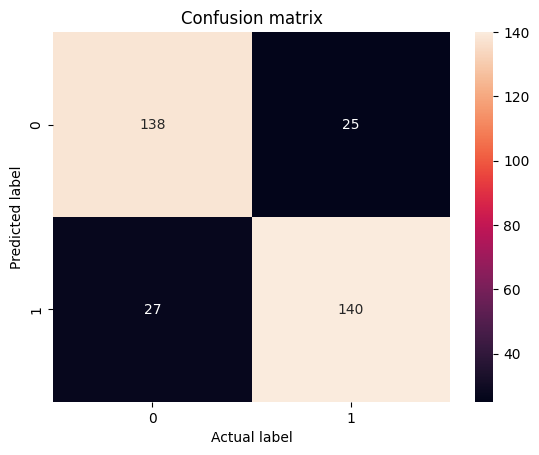

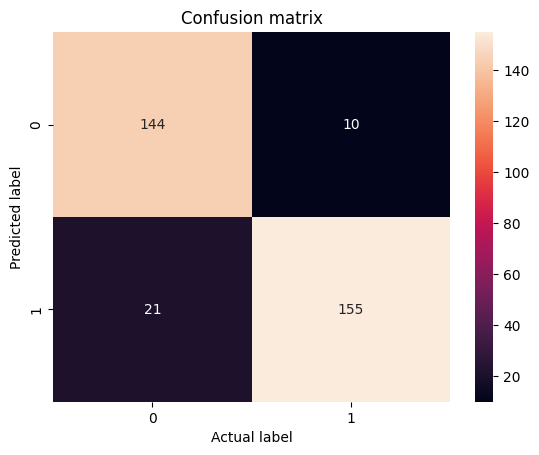

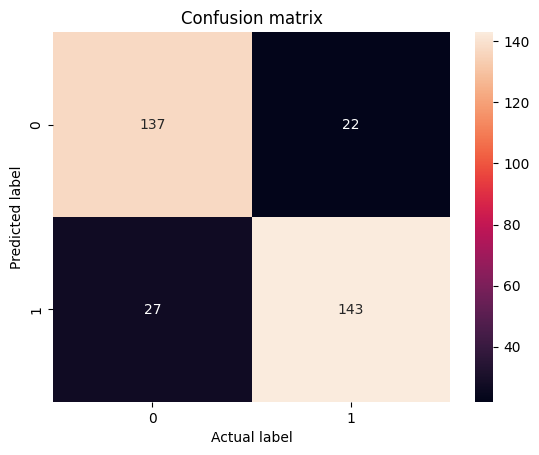

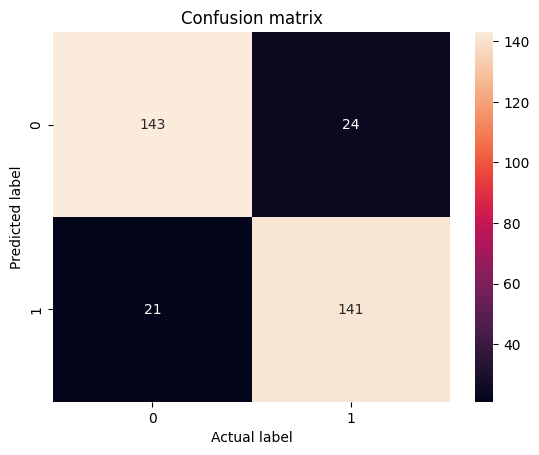

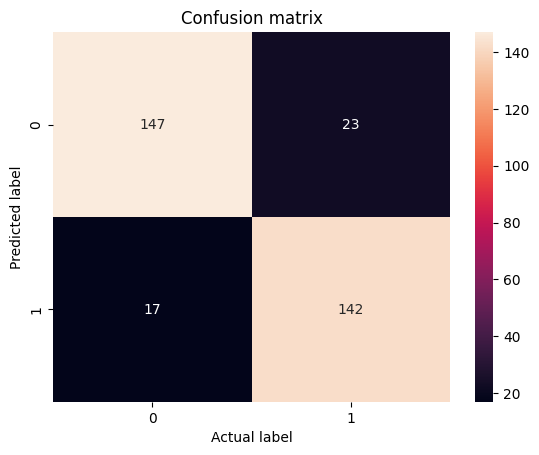

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns


class Adaline:
    def __init__(self, learning_rate=0.01, n_epochs=100):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.costs = []

        for _ in range(self.n_epochs):
            output = self.activation(X)
            errors = y - output
            self.weights[1:] += self.learning_rate * X.T.dot(errors)
            self.weights[0] += self.learning_rate * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.costs.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

# Function print confusion matrix 
def plot_confusion_matrix(predictions, y_test):
    cm = confusion_matrix(predictions, y_test)
    plt.subplots()
    sns.heatmap(cm, fmt=".0f", annot=True)
    plt.title("Confusion matrix")
    plt.xlabel("Actual label")
    plt.ylabel("Predicted label")


# Load the saved dataframe
dataframe = pd.read_pickle('combined_dataframe.pkl')

# Filter the dataframe to include only labels 1 and 2
dataframe = dataframe[dataframe['label'].isin([1, 2])]

# Prepare the input data (X) and labels (y)
X = np.array([np.array(x) for x in dataframe['vector']])
y = np.array(dataframe['label'])

# Convert labels 1 and 2 to -1 and 1
y = np.where(y == 1, -1, 1)

# Normalize the input data
X = (X - X.mean()) / X.std()

skf = StratifiedKFold(n_splits=5)
learning_rate = 0.000001
accuracies =[]

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    adaline = Adaline(learning_rate=learning_rate, n_epochs=1000)
    adaline.fit(X_train, y_train)

    predictions = adaline.predict(X_test)
    accuracy = np.mean(predictions == y_test)
    accuracies.append(accuracy)
    print(f"Iteration {i+1}: Test accuracy: {accuracy * 100:.2f}%")
    # Print confusion matrix and classification report
    print(f"Confusion matrix:\n")
    plot_confusion_matrix(predictions, y_test)
    cr = classification_report(y_test, predictions, target_names=['Negative', 'Positive'])
    print(f"\nClassification report:\n{cr}\n")

# Calculate the average accuracy and standard deviation
avg_accuracy = np.mean(accuracies)
std_deviation = np.std(accuracies)
print(f"Average accuracy: {avg_accuracy * 100:.2f}%")
print(f"Standard deviation: {std_deviation * 100:.2f}%")
